# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W3/fraudTest.csv")
df['trans_date_trans_time'] = pd.to_datetime(df.trans_date_trans_time)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]

In [6]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0
...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,travel,7.99,129,0


# 3.) Create a unique variable out of trans_date.

In [7]:
# If the hour is from 0 to 5
df_select['time_var'] = [i.hour for i in df.trans_date_trans_time]
df_select.time_var = np.where( (df_select.time_var >= 0) & (df_select.time_var <= 5), 1,0)

<ipython-input-7-55e56bc9b46c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.hour for i in df.trans_date_trans_time]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df_select.category.unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [9]:
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt','city_pop','time_var']]],axis=1)
y = df_select['is_fraud']
X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,43.77,519,0
555715,0,0,0,0,0,0,0,1,0,0,0,0,0,0,111.84,28739,0
555716,0,0,0,0,0,0,0,1,0,0,0,0,0,0,86.88,3684,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.99,129,0


# 4.) Oversample the data (this will be your training data). (X)

# 5.) Train a Logistic regression.

In [10]:
from sklearn.linear_model import LogisticRegression

# Not standardized
log_reg = LogisticRegression().fit(X,y)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# predict probabilities
y_prob = log_reg.predict_proba(X)

# desired false positive percentage
target_fn_percentage = 5
threshold = np.percentile(y_prob[:,1], 100-target_fn_percentage)

# make predictions using the selected threshold
y_pred = (y_prob[:,1]>threshold).astype(int)

# calculate the confusion matrix
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[526909,  26665],
       [  1024,   1121]])

In [12]:
print('False Positive Ratio: ', round(conf_mat[0,1] / conf_mat.sum() *100, 3))

False Positive Ratio:  4.798


In [13]:
print("Threshold: ", round(threshold, 3))

Threshold:  0.006


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [14]:
df_result = df[['amt', 'is_fraud']]
df_result = pd.concat([df_result, pd.DataFrame(log_reg.predict(X), columns=['prediction'])], axis=1)

# successful transaction
TN = ( df_result[df_result.is_fraud==0][df_result['prediction']==0]['amt']*0.02 ).sum()
# blocked this transaction so no profit
FP = ( df_result[df_result.is_fraud==0][df_result['prediction']==1]['amt']*0 ).sum()
# it's fraud so the company loses money
FN = ( df_result[df_result.is_fraud==1][df_result['prediction']==0]['amt']*(-1) ).sum()
# blocked this transaction so no profit
TP = ( df_result[df_result.is_fraud==1][df_result['prediction']==1]['amt']*0 ).sum()

print('Profit:', TN + FP + FN + TP)

Profit: -402513.5047999999


<ipython-input-14-77ffe1e8650a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TN = ( df_result[df_result.is_fraud==0][df_result['prediction']==0]['amt']*0.02 ).sum()
<ipython-input-14-77ffe1e8650a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FP = ( df_result[df_result.is_fraud==0][df_result['prediction']==1]['amt']*0 ).sum()
<ipython-input-14-77ffe1e8650a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FN = ( df_result[df_result.is_fraud==1][df_result['prediction']==0]['amt']*(-1) ).sum()
<ipython-input-14-77ffe1e8650a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TP = ( df_result[df_result.is_fraud==1][df_result['prediction']==1]['amt']*0 ).sum()


# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)

In [16]:
# see if the varivables all got zero -> input data is terrible
mod1 = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X_scale,y) 

Text(0.5, 1.0, 'Lasso Logistic Regression Coefficients')

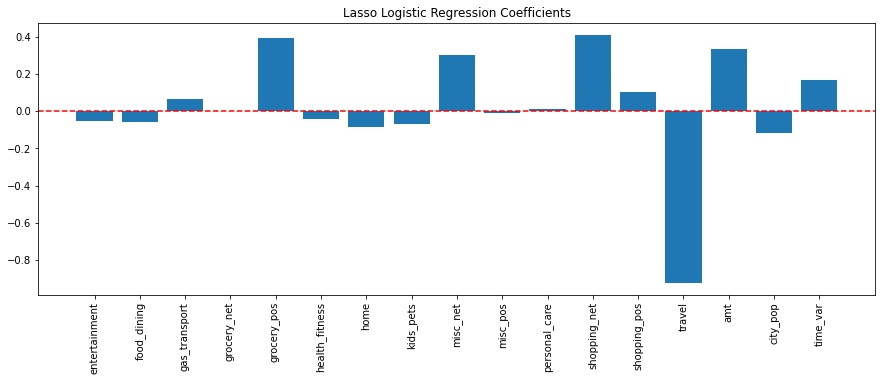

In [17]:
fig = plt.figure(figsize=(15,5))
plt.bar(list(X.columns), mod1.coef_.flatten())
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xticks(rotation=90)
plt.title('Lasso Logistic Regression Coefficients')

Almost all the coefficients survived the regularization and lasso (except for some dummy variables), so it could be a model with relevant features. However, this model works poorly since if a company follows this classification, the company will lose money. 